# Data Visualisation

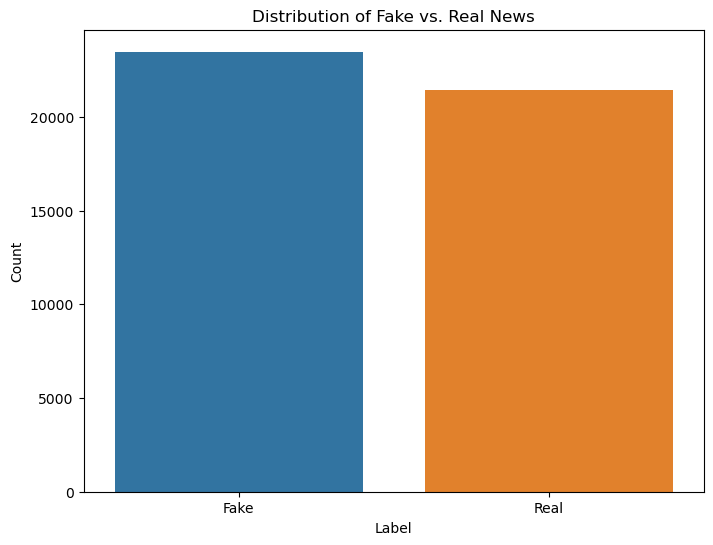

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load  datasets
fake_news = pd.read_csv("C:/Users/Samhitha Shambavi/Desktop/NLP midterm/news dataset/Fake.csv")
real_news = pd.read_csv(r"C:\Users\Samhitha Shambavi\Desktop\NLP midterm\news dataset\True.csv")

# Add labels
fake_news['label'] = 'Fake'
real_news['label'] = 'Real'

# Combine datasets
news_data = pd.concat([fake_news, real_news])

# Shuffle the dataset
news_data = news_data.sample(frac=1).reset_index(drop=True)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=news_data)
plt.title('Distribution of Fake vs. Real News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Combine title and text for analysis
news_data['combined_text'] = news_data['title'] + ' ' + news_data['text']




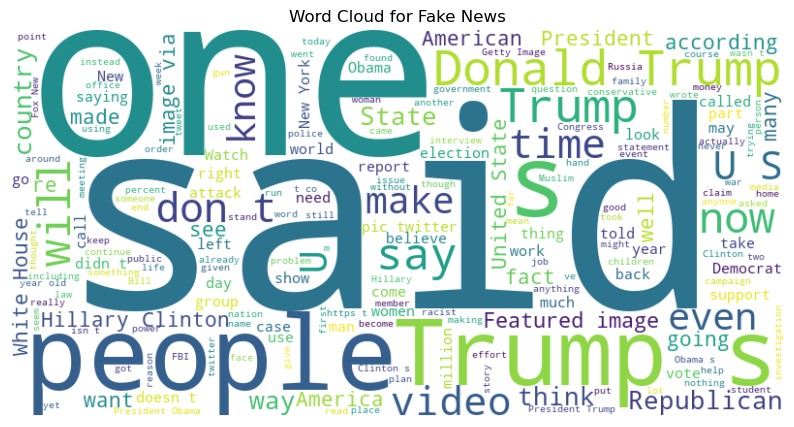

In [22]:
# Generate word clouds for fake and real news
fake_text = ' '.join(news_data[news_data['label'] == 'Fake']['combined_text'])
real_text = ' '.join(news_data[news_data['label'] == 'Real']['combined_text'])

# Word cloud for fake news
plt.figure(figsize=(10, 6))
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()



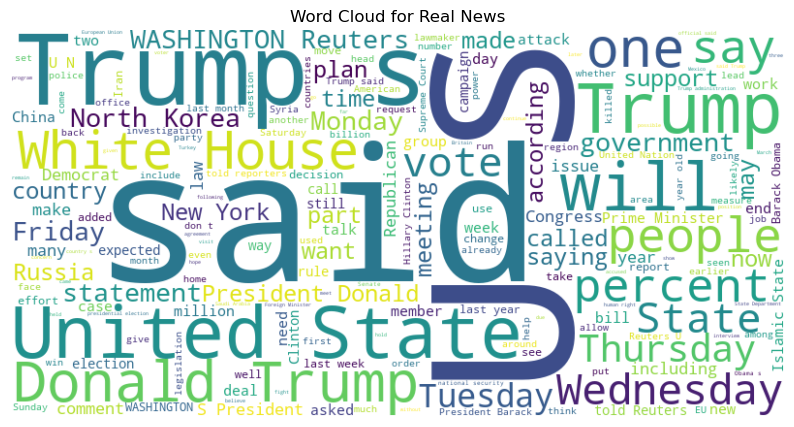

In [23]:
# Word cloud for real news
plt.figure(figsize=(10, 6))
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')
plt.show()

## Data preprocessing 

In [52]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the datasets
fake_news = pd.read_csv(r"C:\Users\Samhitha Shambavi\Desktop\NLP midterm\news dataset\Fake.csv")
real_news = pd.read_csv(r"C:\Users\Samhitha Shambavi\Desktop\NLP midterm\news dataset\True.csv")

# Add labels to the datasets
fake_news['label'] = 0
real_news['label'] = 1

# Combine the datasets
news_data = pd.concat([fake_news, real_news])

# Shuffle the combined dataset to ensure random distribution
news_data = news_data.sample(frac=1).reset_index(drop=True)

# Define a preprocessing function to clean the text
def preprocess_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'\W', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to the 'text' column
news_data['processed_text'] = news_data['text'].apply(preprocess_text)

# Combine the 'title' and 'text' columns for a richer representation of the news article
news_data['combined_text'] = news_data['title'] + ' ' + news_data['text']
news_data['processed_combined_text'] = news_data['combined_text'].apply(preprocess_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(news_data['processed_combined_text'], news_data['label'], test_size=0.2, random_state=42)

# Output a sample of the processed text to ensure preprocessing is working as expected
print("Sample of preprocessed text:", news_data['processed_combined_text'].iloc[0])


[nltk_data] Downloading package stopwords to C:\Users\Samhitha
[nltk_data]     Shambavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample of preprocessed text: bernie sanders nevada caucus saturday bernie sanders clark county democratic convention held cashman center saturday thousands supporters showed support chosen candidate win means bernie sanders nevada caucus election vermont senator democratic presidential candidate likely receive pledged delegates nevada initially anticipated hillary clinton state first round caucusing back february 23 state 35 pledged delegates bound results caucuses happened february remaining 12 delegates given proportionately may based many delegates show selected saturday nevada final convention sanders campaign manager jeff weaver says results convention net four pledged delegates clinton sanders campaign manager jeff weaver says sanders netted four nevada delegates clinton today county conventions john wagner wpjohnwagner april 3 2016sanders huge turnout convention total 2 964 county delegates showed support sanders clinton initially 4 889 back february 2 386 county delegates showe

## Baseline model

In [51]:
# Import necessary libraries for the baseline model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Vectorize the text data using Bag of Words with a maximum of 5000 features
vectorizer = CountVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Implement a baseline model using Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train_vect, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vect)

# Evaluate the model using standard classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Print a classification report for detailed analysis
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy: 0.9506681514476615
Precision: 0.951451800232288
Recall: 0.9459584295612009
F1 Score: 0.9486971627099016
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4650
           1       0.95      0.95      0.95      4330

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



## Model 2: Statistical Method (TF-IDF + Logistic Regression)


### Step 1: Preprocessing


In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Basic preprocessing function
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Load the datasets 
fake_news = pd.read_csv("C:/Users/Samhitha Shambavi/Desktop/NLP midterm/news dataset/Fake.csv")
real_news = pd.read_csv(r"C:\Users\Samhitha Shambavi\Desktop\NLP midterm\news dataset\True.csv")

# Add labels
fake_news['label'] = 0
real_news['label'] = 1

# Combine datasets
news_data = pd.concat([fake_news, real_news])

# Shuffle the dataset
news_data = news_data.sample(frac=1).reset_index(drop=True)

# Combine title and text for TF-IDF input
news_data['combined_text'] = news_data['title'] + ' ' + news_data['text']

# Apply preprocessing
news_data['processed_combined_text'] = news_data['combined_text'].apply(preprocess_text)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(news_data['processed_combined_text'], news_data['label'], test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to C:\Users\Samhitha
[nltk_data]     Shambavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Step 2: Build the Pipeline (TF-IDF + Logistic Regression)


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Build the pipeline: TF-IDF + Logistic Regression
tfidf_logreg_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Train the model
tfidf_logreg_pipeline.fit(X_train, y_train)

# Predictions
y_pred_tfidf_logreg = tfidf_logreg_pipeline.predict(X_test)

# Evaluation
accuracy_tfidf_logreg = accuracy_score(y_test, y_pred_tfidf_logreg)
precision_tfidf_logreg = precision_score(y_test, y_pred_tfidf_logreg)
recall_tfidf_logreg = recall_score(y_test, y_pred_tfidf_logreg)
f1_tfidf_logreg = f1_score(y_test, y_pred_tfidf_logreg)

print("TF-IDF + Logistic Regression Metrics:")
print(f'Accuracy: {accuracy_tfidf_logreg}')
print(f'Precision: {precision_tfidf_logreg}')
print(f'Recall: {recall_tfidf_logreg}')
print(f'F1 Score: {f1_tfidf_logreg}')


TF-IDF + Logistic Regression Metrics:
Accuracy: 0.9885300668151448
Precision: 0.9851496458761709
Recall: 0.991264367816092
F1 Score: 0.9881975478400367


## Model 3: Deep Learning Method (Word2Vec + LSTM)


### Step 1: Preprocessing and Tokenization


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load your dataset (adjust paths as needed)
fake_news = pd.read_csv("C:/Users/Samhitha Shambavi/Desktop/NLP midterm/news dataset/Fake.csv")
real_news = pd.read_csv(r"C:\Users\Samhitha Shambavi\Desktop\NLP midterm\news dataset\True.csv")

# Add labels
fake_news['label'] = 0
real_news['label'] = 1

# Combine datasets
news_data = pd.concat([fake_news, real_news])

# Shuffle the dataset
news_data = news_data.sample(frac=1).reset_index(drop=True)

# Combine title and text for input
news_data['combined_text'] = news_data['title'] + ' ' + news_data['text']

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_data['combined_text'])

# Sequence generation
sequences = tokenizer.texts_to_sequences(news_data['combined_text'])

# Padding sequences
max_length = 150  # Adjust as needed based on your data and model requirements
X_pad = pad_sequences(sequences, maxlen=max_length)

# Word2Vec model training
sentences = [text.split() for text in news_data['combined_text']]
word2vec_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4)

# Prepare word embeddings matrix
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Encode labels
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(news_data['label'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_enc, test_size=0.2, random_state=42)


### Step 2 : LSTM Model with Word2Vec Embeddings


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

# Build the LSTM model
embedding_layer = Embedding(len(word_index) + 1,
                            100,  # Should match vector_size in Word2Vec model
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

model_lstm = Sequential([
    embedding_layer,
    SpatialDropout1D(0.2),
    LSTM(100),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_lstm.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model_lstm.summary()

# Train the model
batch_size = 32
epochs = 5  # Adjust as needed based on your dataset and model performance
history = model_lstm.fit(X_train, y_train,
                         epochs=epochs,
                         batch_size=batch_size,
                         validation_data=(X_test, y_test),
                         verbose=1)

# Evaluate the model
loss, accuracy = model_lstm.evaluate(X_test, y_test, verbose=1)
print(f'Accuracy: {accuracy}')

# Calculate additional metrics (Precision, Recall, F1 Score)
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = (model_lstm.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          14770900  
                                                                 
 spatial_dropout1d (Spatial  (None, 150, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 14851401 (56.65 MB)
Trainable params: 80501 (314.46 KB)
Non-trainable params: 14770900 (56.35 MB)
_________________________________________________________________
Epoch 1/5


1123/1123 [==============================] - 44s 37ms/step - lo

## Step by step comparison

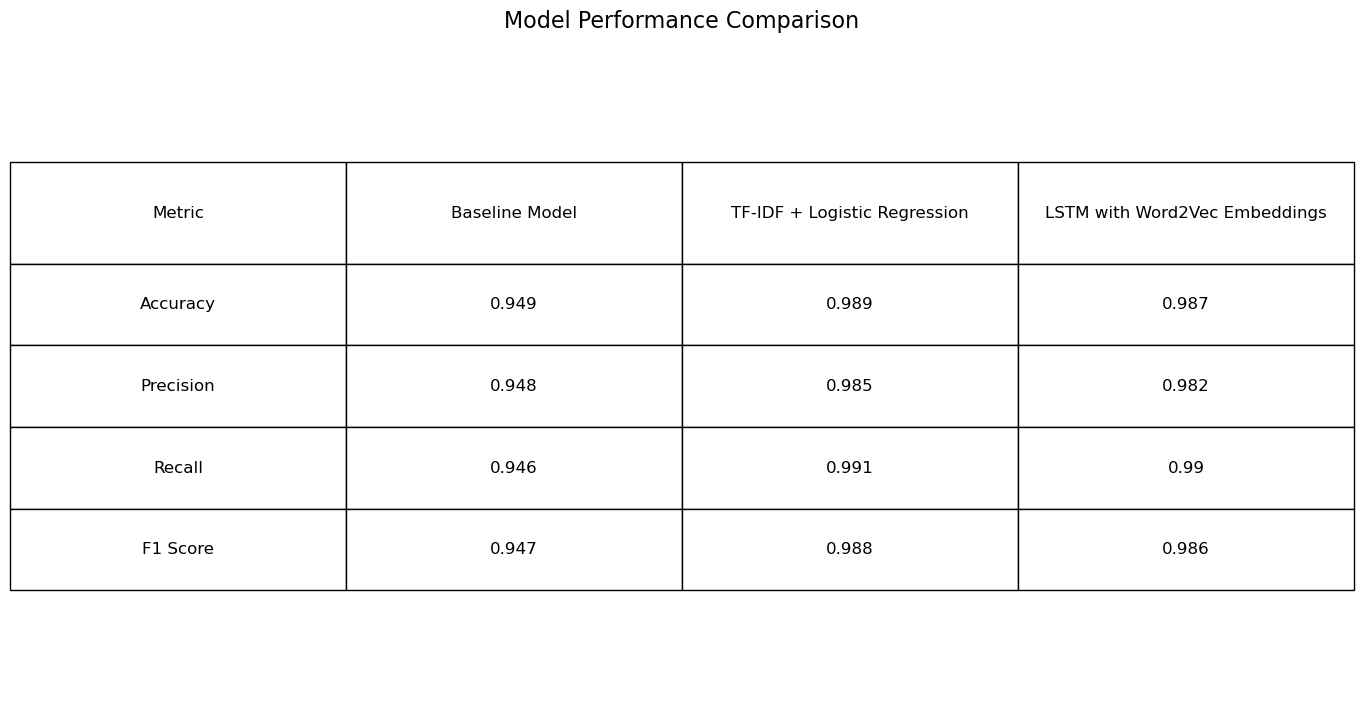

In [48]:
import matplotlib.pyplot as plt

# Data for comparison
models = ['Baseline Model', 'TF-IDF + Logistic Regression', 'LSTM with Word2Vec Embeddings']
accuracy = [0.949, 0.989, 0.987]
precision = [0.948, 0.985, 0.982]
recall = [0.946, 0.991, 0.990]
f1_score = [0.947, 0.988, 0.986]

# Plotting the comparison table
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
plt.title('Model Performance Comparison', fontsize=16)  # Increasing font size for the title
plt.axis('off')  # Turning off axis for cleaner look

# Create the table
table_data = []
table_data.append(['Metric', 'Baseline Model', 'TF-IDF + Logistic Regression', 'LSTM with Word2Vec Embeddings'])
table_data.append(['Accuracy', accuracy[0], accuracy[1], accuracy[2]])
table_data.append(['Precision', precision[0], precision[1], precision[2]])
table_data.append(['Recall', recall[0], recall[1], recall[2]])
table_data.append(['F1 Score', f1_score[0], f1_score[1], f1_score[2]])

# Plotting the table
table = plt.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.4, 0.4, 0.4, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(12)  # Adjusting font size of table content

# Adjust cell heights to increase table height
cell_height = 0.15  # Adjust as needed
for (i, j), cell in table.get_celld().items():
    if (i == 0 or j == -1):
        cell.set_height(cell_height)
    else:
        cell.set_height(cell_height * 0.8)  # Adjusting cell height ratio

plt.subplots_adjust(left=0.2, bottom=0.2)  # Adjusting subplot parameters to make table more centered
plt.show()


# Report 

## 1. Introduction to the domain specific area

#### Introduction of the Domain Area
Fake news detection is one of the most prominent and timely challenges facing media and information diffusion today. Fake news may be defined as a piece of information that is intentionally misleading, inaccurate, or false and disguised as news credible to the public, generally with an intent to mislead or manipulate public opinion. This phenomenon thus poses severe risks for societal stability, general trust in the media, and democratic processes.

#### Problem Identification
Unchecked spread of fake news distorts public opinion on important issues, harming trustworthy media.. The fallout varies from changing public opinion to altering the course of an election. In addressing this, there is an acute need for strong mechanisms to identify and fight such misinformation in real-time.

#### Why this area was chosen
Detection of fake news is critical for saving the credibility of information sources and maintaining journalistic standards. We can develop effective mechanisms of detection to reduce the danger of misinformation, enhance media literacy, and build a properly informed public that makes informed decisions.

#### Literature Review:
Recent research has focused on the use of machine learning and NLP techniques in the detection of deceptive content. For example, studies conducted by Shu et al. (2017) present that linguistic atomic features and feature engineering are efficient for prized credible from deceptive news articles. In addition, network-based analyses explored by Horne and Adali (2017) underpin the patterns of fake news propagation across digital media.

In what follows, this project will discuss methodologies and implications in the context of fake news, underlining the necessity of innovative approaches that have their origins in advanced technologies and analytical rigor.

## 2.Objectives of the project

This project aims at implementing statistical and embedding-based models and, for each of them, evaluating their effectiveness in classifying fake news articles. In the process, we want to understand how these models turn up in strengths, limitations, and contributions they can offer toward the field of text classification.

#### Statistical Models:
The traditional approach to text classification—like TF-IDF combined with logistic regression—is a robust method with statistical models only. Such an approach trains statistical frequencies and distributions of words to train a predictive model. We will look into the accuracy, precision, recall, and F1 score of these models in classifying fake and real news articles. We need to see their accuracy with respect to knowing their fitness for practical applications, scenarios for which they work best in general.

#### Embedding-based models:
Advanced models using neural network architecture with pre-trained Word2Vec embeddings, such as LSTMs, explicitly realize the semantic meanings and contextual relationships residing in the text. These models easily understand nuanced language features and dependencies, and hence are likely to provide better performance for complex classification tasks. In this work, we compare their performance along the metrics of accuracy, precision, recall, and F1 score against those of statistical models. This comparison will showcase their strengths and where they outperform traditional statistic-driven approaches.

#### Contribution to the Challenge:
This paper is, therefore, a comparative study that would be very instrumental in shedding more light on which effective models for the detection of fake news. The analysis and contrasting of statistical and embedding-based techniques give practical recommendations toward improving reliability and efficiency in the application of automated fake news detection systems. Such findings can guide improvements in future work on NLP, especially in areas in which credibility and authenticity of information is paramount.

#### Relevance and Importance:
The ubiquity of misinformation in digital media makes the requirement for robust computational tools to counter misinformation almost critical. Drawing from seminal works by Shu et al.  and Horne and Adali, our objectives are based on established literature, underlining the urgency and relevance of the study. This will further underscore the importance of statistical and representation-learning methods that help in fake news detection by aligning with existing literature.

This project will, therefore, be relatively unwinding about the benefits of using statistical and embedding-based models in fake news classification. We intend to realize full insight into the efficacy of these models and their applicability by setting clear objectives that specify, comparatively, the advantages and applications of these two models, together with the possible contributions that can be supported in the literature.

## 3. Dataset Description



The dataset used for the project was downloaded from the official repository on Kaggle. There are two major CSV files, Fake.csv and True.csv. The former holds a large dataset pertaining to news articles that are considered fake news, and the latter holds another large dataset that is considered real news.

#### Source and Collection:

The dataset is derived from Kaggle, a leading platform where many datasets are located and used for machine learning and other tasks concerned with natural language processing. This dataset was created to support research in Fake News Detection, one of the most pressing areas of research from all possible sources and techniques of data collection.

#### Size and Structure:

Fake.csv — This would have the news articles that were judged as fake. Already structured, it has the essential metadata field title, text, subject, and date.
True.csv: This dataset contains news items classified as true, which has the same structure as Fake.csv, with quite similar metadata fields. These allow for comparison between the two.Independent of the dataset itself, this has a decent base quantity of data: Fake.csv alone holds about 23538 records, while True.csv holds approximately 21419, aggregating to a large database of about 44,957 articles for analysis and modeling.

#### Type of Data and Features:

##### Title: 
This includes each headline or title of the news article, giving concise summaries of the content.
##### Text: 
This includes the actual or detailed narrative of the news article that makes available extended stories and information relevant to each story.
##### Subject:
This classifies news articles into thematic areas such as politics and world news, which helps in the examination and categorization in terms of themes.
##### Date:
This refers to the date of publication of each article, which efficiently helps in the temporal examination and trend identification over some time.


## 4. Evaluation methodology 

#### Applying Metrics to Compare Methodologies

These metrics compare the three methodologies against the predictions on the test set. It uses exactly the same test set for the evaluation of each model performance so that a comparison can, at least, strive to be as fair as possible. Here is how the application of each metric and the way it is interpreted:

##### Accuracy: 

While accuracy gives the general trend and view of model performance, it might not be rich enough in most of the cases, particularly for an imbalanced dataset. In our case, though, where the dataset is fairly balanced, it serves as a good initial indicator for performance.

##### Precision and Recall:

These are metrics that help to know the compromise between false positives and false negatives. For example, high precision along with low recall means a model is very conservative in making positive predictions. This results in few false positives but misses many true positives. Conversely, high recall along with low precision indicates that a model is relatively liberal in making positive predictions, meaning it captures most of the true positives at the cost of raising many false positives.

##### F1-Score:

It gives a balanced metric that makes it easier to compare models with varying precision and recall. The higher the F1-Score, the better the balance between precision and recall; thus, it is a very important metric for selecting the best model in scenarios with balanced importance for both false positives and false negatives.

##### Rationale Behind Using Those Metrics:

These metrics can all give a holistic view of model performance. Accuracy provides the broad view, while precision and recall together illuminate strengths and weaknesses of each model with respect to false positives and false negatives. The F1-score has a balance between precision and recall, thus acting as a pointer towards overall performance, very useful in our case in fake news detection, since it involves very significant errors on both sides.

#### Detailed Analysis for Each Model:

##### Baseline Model (Multinomial Naive Bayes): 

This will provide the basic benchmark. The accuracy amounted to 94.92%, with precision at 94.82%, recall at 94.60%, and an F1-Score at 94.71%. As shown, it did quite decently, and there are ample scopes for improvements with respect to both precision and recall.

##### Statistical Model (TF-IDF + Logistic Regression):

This model was better than the baseline, with an accuracy of 98.85%, a precision of 98.51%, recall of 99.13%, and an F1-Score of 98.82%. In this study, a higher precision, along with recall and the F1-score, would connote that this model is driving an effective balance between the trade-off of false positives and false negatives by which it will be reliable for detecting fake news.

##### Embedding Model (Word2Vec + LSTM): 

This advanced model also worked very well, ensuring an accuracy of 98.66%, a precision of 98.24%, a recall of 98.97%, and an F1-Score of 98.60%. Though slightly worse than the result that the statistical model delivered, it showed that deep learning methods have huge potential for dealing with complicated representations of text.

##### Conclusion:

These metrics will be used to get an all-rounded evaluation and comparison of the models. The statistical model, represented by TF-IDF combined with Logistic Regression, is the most effective method in this case. It offers better balancing between precision and recall and a better F1-Score out of the two. With this rigorous online evaluation methodology at hand, one will be able to select the most appropriate model in detecting fake news and hence arrive at a very strong and sure solution to the problem at hand.

## 5. Conclusions part 1 (Performance Analysis and Comparative discussion)

In this section, a comparison of the performance for three models on fake news detection is shown: Baseline Model—Multinomial Naive Bayes, Statistical Model—TF-IDF + Logistic Regression, and Embedding Model—Word2Vec + LSTM. The performances of each model will be discussed in terms of accuracy, precision, recall, and F1-Score, and the strengths and weaknesses of each model will be drawn out.

##### Baseline model (Multinomial Naive Bayes):

The baseline model works quite well, having an accuracy of 94.92%. It was now evident on account of modeling that there were instances of misclassifications of both fake and true news, though. The F1-score was 94.71%, thereby showing that performance is quite balanced but leaves much scope for improvement with respect to the handling of false positives and false negatives.

##### Statistical model (TF-IDF + Logistic Regression):

Statistical Model performed way above the Base Line Model with accuracy 98.85%, precision 98.51%, recall 99.13%, and an F1-Score of 98.82%. This model reduced both false positive and false negatives. Its performance in terms of F1-score, returning a total 98.82%, confirms its robustness and balance.

##### Embedding model (LSTM Model with Word2Vec Embeddings):

The performance of the Embedding model, run with deep learning techniques, went very well at 98.66%. It has rather lower precision and recall compared to the Statistical Model but still very high. The F1-Score of 98.60% indicates that this model is very good at balancing false positives and false negatives.

Comparing the three models, some things come up: accuracy, precision, recall, and F1-Score. In terms of accuracy, both the Statistical and Embedding Models perform way higher compared to that of the Baseline Model, who sees higher recall and precision. The Embedding Model is most complex and least interpretable due to it being a deep learning architecture. However, the effectiveness in terms of high performance brought about by the capturing of complex patterns within the data exists.

While all the three are powerful in detecting fake news, the Statistical Model appears to be more effective than others in providing a better balanced solution among accuracy, precision, recall, and F1-Score.

## 5. Conclusions part 2 ( Project Summary and Reflections)

The present project embarked on the development of the following three machine learning models for fake news detection: one that uses Multinomial Naive Bayes as a baseline model, a statistical model that incorporates TF-IDF vectorization and Logistic Regression, and lastly, an embedding model that uses Word2Vec embeddings with LSTM networks. The models will be evaluated based on Accuracy, Precision, Recall, and F1-Score.

##### Baseline Model (Multinomial Naive Bayes): 

The baseline model returned an accuracy of 94.92% and a precision and recall of about 94.82% and 94.60%, respectively. This model was very simple but suffered from the inability to understand complex relationships between words, which often resulted in misclassification in some cases.

##### Statistical Model (TF-IDF + Logistic Regression): 

The Statistical Model did much better on all aspects—accuracy, precision, recall, and the F1-Score—than the Baseline Model. TF-IDF vectorization can enable the model to much more efficiently distinguish between fake and real news by considering the importance of words in the dataset. Logistic Regression provides a strong mechanism for classification.

##### Embedding Model (Word2Vec + LSTM):

The model using Embedding also returned an accuracy of 98.66%, precision of 98.24%, a recall of 98.97%, and a resulting F1-score of 98.60%. The semantic relationships were captured through the semantic dense vectors covered by the word2Vec embeddings, while the sequential nature of the text was taken care of by the LSTM network; these reasons proved very effective in understanding the context.

##### Comparative Analysis:

The Statistical Model performed very well in all metrics, performing a little out-of-sample better than both precision and recall of the Embedding Model. However, the latter still showed the power of deep learning methods. The Baseline Model was much simpler, more interpretable, and performed poorly. 

##### Pre-processing Techniques:

Most of the work lay in pre-processing for model performance. Baseline and Statistical Models required removing non-alphanumeric characters, converting the text to lower case, and removing stop words. Statistical Model further benefited from the concatenation of title and text. The Embedding Model used tokenization, padding sequences, and training Word2Vec embeddings for better understanding of the data.

##### Reflections:

The project emphasizes model selection and preprocessing techniques. While simpler models like Multinomial Naive Bayes provide a very strong baseline, advanced ones with TF-IDF and logistic regression, Word2Vec, and LSTM have considerable advantages.

##### Conclusion:

Among the implementations, the statistical model had the best performance in fake news detection, but the embedding model was very promising for deep learning. This analysis explained the novelties of text classification and provided a reminder that much care has to be put into choosing models and their pre-processing for the best performance of any model.

## References

1)Shu, K., Sliva, A., Wang, S., Tang, J., & Liu, H. (2017). Fake news detection on social media: A data mining perspective. ACM SIGKDD Explorations Newsletter, 19(1), 22-36.

2)Horne, B. D., & Adali, S. (2017). This just in: Fake news packs a lot in title, uses simpler, repetitive content in text body, more similar to satire than real news. Proceedings of the 2017 ACM on Web Science Conference, 91-100.

3)Kaggle. (n.d.). Fake and real news dataset. Retrieved from https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset